In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel("Spending data.xls",skiprows=[0],header=1)

#### Let's prepare columns and their value for analysis

In [3]:
df['boardapprovaldate'] = pd.to_datetime(df['boardapprovaldate'], errors='coerce')

# Check for non-null values in the 'boardapprovaldate' column after conversion
valid_dates = df[df['boardapprovaldate'].notnull()]

# Set 'boardapprovaldate' as the DataFrame index for time-series analysis
valid_dates.set_index('boardapprovaldate', inplace=True)

##### The code converts column 'boardapprovaldate' to a standardized datetime format, which is important to run time-serise analysis, it filters valid date entries, and sets it as the DataFrame index. This ensures uniformity, filters out null or invalid dates, and organizes data for accurate time-series analysis, crucial for chronological data handling and plotting trends over time.

##### Now we are all set to go to next step, which is Time-Serise analysis, So let's start :- 

#### 1. Goverment Spending over the Years

In [4]:
monthly_spending = valid_dates['curr_total_commitment'].resample('M').sum()
monthly_spending

boardapprovaldate
1947-05-31 00:00:00+00:00    250000000.0
1947-06-30 00:00:00+00:00            0.0
1947-07-31 00:00:00+00:00            0.0
1947-08-31 00:00:00+00:00    247000000.0
1947-09-30 00:00:00+00:00            0.0
                                ...     
2025-03-31 00:00:00+00:00            0.0
2025-04-30 00:00:00+00:00            0.0
2025-05-31 00:00:00+00:00            0.0
2025-06-30 00:00:00+00:00            0.0
2025-07-31 00:00:00+00:00            0.0
Freq: M, Name: curr_total_commitment, Length: 939, dtype: float64

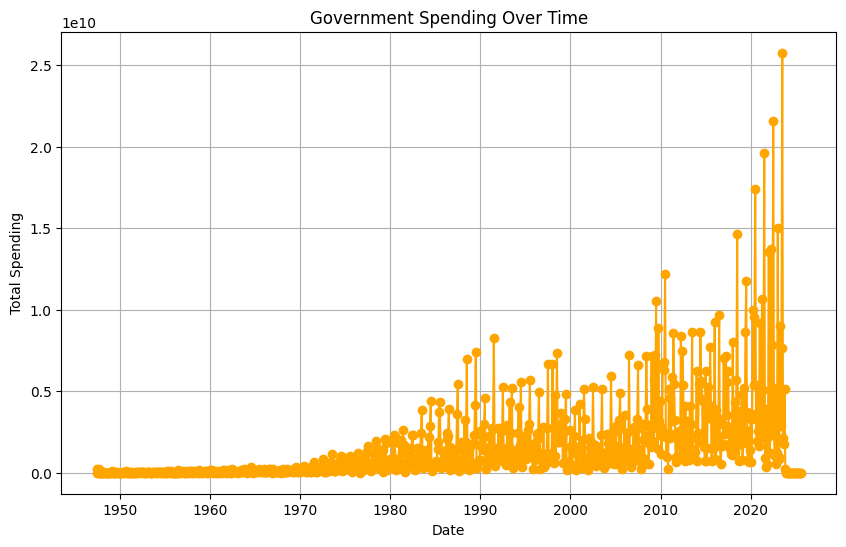

In [5]:
# Plotting another chart to show spending over time (using a line plot)
plt.figure(figsize=(10, 6))
plt.plot(monthly_spending.index, monthly_spending.values, marker='o', linestyle='-', color='orange')
plt.title('Government Spending Over Time')
plt.xlabel('Date')
plt.ylabel('Total Spending')
plt.grid(True)
plt.show()

##

##

#### 2. Grant Amount over the time

In [6]:
monthly_grant_amounts = valid_dates['grantamt'].resample('M').sum()
monthly_grant_amounts

boardapprovaldate
1947-05-31 00:00:00+00:00    0.0
1947-06-30 00:00:00+00:00    0.0
1947-07-31 00:00:00+00:00    0.0
1947-08-31 00:00:00+00:00    0.0
1947-09-30 00:00:00+00:00    0.0
                            ... 
2025-03-31 00:00:00+00:00    0.0
2025-04-30 00:00:00+00:00    0.0
2025-05-31 00:00:00+00:00    0.0
2025-06-30 00:00:00+00:00    0.0
2025-07-31 00:00:00+00:00    0.0
Freq: M, Name: grantamt, Length: 939, dtype: float64

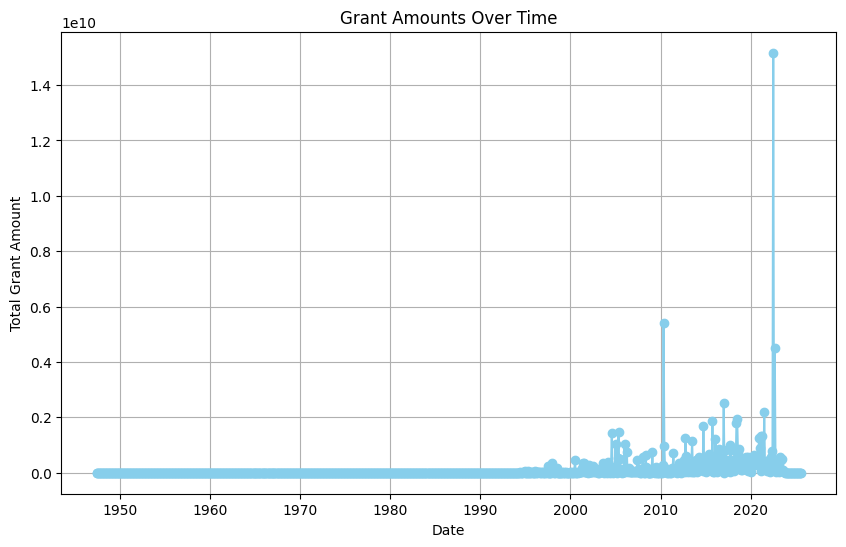

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(monthly_grant_amounts.index, monthly_grant_amounts.values, marker='o', linestyle='-', color='skyblue')
plt.title('Grant Amounts Over Time')
plt.xlabel('Date')
plt.ylabel('Total Grant Amount')
plt.grid(True)
plt.show()

##

##

#### 3. Trend of total commitment amounts over time based on different project statuses

In [8]:
status_commitment = valid_dates.pivot_table(index=valid_dates.index.to_period('M'),
                                            columns='projectstatusdisplay',
                                            values='curr_total_commitment',
                                            aggfunc='sum')

status_commitment

C:\Users\panka\AppData\Local\Temp\ipykernel_14544\1532000209.py:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  status_commitment = valid_dates.pivot_table(index=valid_dates.index.to_period('M'),


projectstatusdisplay,Active,Closed
boardapprovaldate,,
1947-05,NaN,250000000.0
1947-08,NaN,247000000.0
1948-03,NaN,16000000.0
1948-07,NaN,8000000.0
1949-01,NaN,109100000.0
...,...,...
2023-07,2.114530e+09,NaN
2023-08,1.786500e+09,NaN
2023-09,5.151500e+09,NaN


<Figure size 1200x800 with 0 Axes>

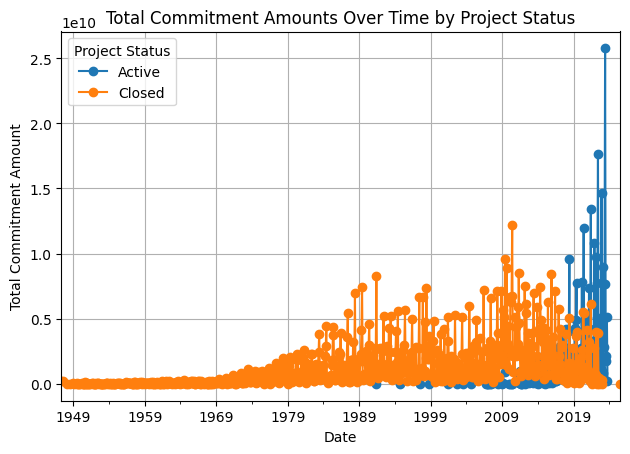

In [9]:
plt.figure(figsize=(12, 8))
status_commitment.plot(kind='line', marker='o')
plt.title('Total Commitment Amounts Over Time by Project Status')
plt.xlabel('Date')
plt.ylabel('Total Commitment Amount')
plt.legend(title='Project Status')
plt.grid(True)
plt.tight_layout()
plt.show()

##

##

#### 4. Monthly trends of project counts across different project statuses over time.

In [10]:
status_counts = valid_dates.groupby([pd.Grouper(freq='M'), 'projectstatusdisplay']).size().unstack()

status_counts

projectstatusdisplay,Active,Closed
boardapprovaldate,,
1947-05-31 00:00:00+00:00,NaN,1.0
1947-08-31 00:00:00+00:00,NaN,3.0
1948-03-31 00:00:00+00:00,NaN,2.0
1948-07-31 00:00:00+00:00,NaN,3.0
1949-01-31 00:00:00+00:00,NaN,3.0
...,...,...
2023-07-31 00:00:00+00:00,25.0,NaN
2023-08-31 00:00:00+00:00,12.0,NaN
2023-09-30 00:00:00+00:00,24.0,NaN


<Figure size 1200x800 with 0 Axes>

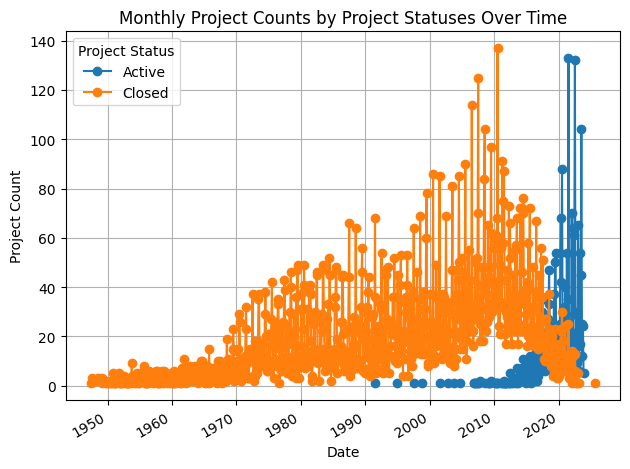

In [11]:
plt.figure(figsize=(12, 8))
status_counts.plot(kind='line', marker='o')
plt.title('Monthly Project Counts by Project Statuses Over Time')
plt.xlabel('Date')
plt.ylabel('Project Count')
plt.legend(title='Project Status')
plt.grid(True)
plt.tight_layout()
plt.show()

##

##

#### 5.Total Commitment Amounts Over Time by Region

In [12]:
region_commitment = valid_dates.pivot_table(index=valid_dates.index.to_period('M'),
                                            columns='regionname',
                                            values='curr_total_commitment',
                                            aggfunc='sum')

region_commitment

C:\Users\panka\AppData\Local\Temp\ipykernel_14544\2599170156.py:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  region_commitment = valid_dates.pivot_table(index=valid_dates.index.to_period('M'),


regionname,Africa,East Asia and Pacific,Eastern and Southern Africa,Europe and Central Asia,Latin America and Caribbean,Middle East and North Africa,Other,South Asia,Western and Central Africa
boardapprovaldate,,,,,,,,,
1947-05,NaN,NaN,NaN,250000000.0,NaN,NaN,NaN,NaN,NaN
1947-08,NaN,NaN,NaN,247000000.0,NaN,NaN,NaN,NaN,NaN
1948-03,NaN,NaN,NaN,NaN,1.600000e+07,NaN,NaN,NaN,NaN
1948-07,NaN,NaN,NaN,8000000.0,NaN,NaN,NaN,NaN,NaN
1949-01,NaN,NaN,NaN,NaN,1.091000e+08,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2023-07,NaN,1.386000e+08,8.050000e+08,97430000.0,2.120000e+08,350000000.0,NaN,492000000.0,1.950000e+07
2023-08,NaN,NaN,1.650000e+07,70000000.0,1.150000e+09,0.0,NaN,250000000.0,3.000000e+08
2023-09,NaN,1.016500e+09,1.348000e+09,NaN,1.900000e+08,150000000.0,NaN,402000000.0,2.045000e+09


<Figure size 1200x800 with 0 Axes>

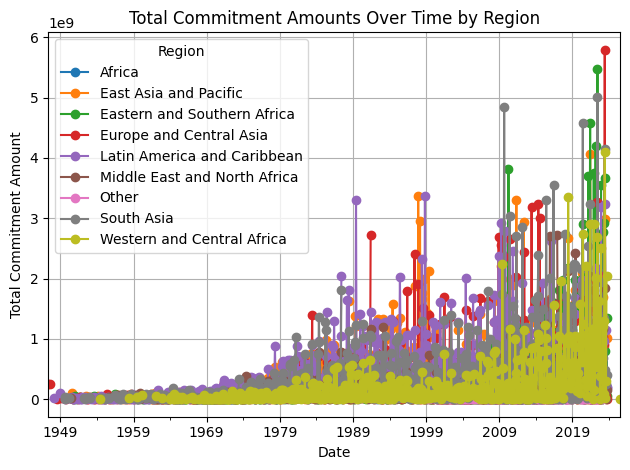

In [13]:
plt.figure(figsize=(12, 8))
region_commitment.plot(kind='line', marker='o')
plt.title('Total Commitment Amounts Over Time by Region')
plt.xlabel('Date')
plt.ylabel('Total Commitment Amount')
plt.legend(title='Region')
plt.grid(True)
plt.tight_layout()
plt.show()

##

##